In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats
import seaborn as sns

In [3]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
"drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
"num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower", "peak-rpm","city-mpg","highway-mpg","price"]
df= pd.read_csv(url,header=None)
df.columns=headers

In [4]:
print(df.head(3))

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

In [5]:
#replace with the mean value 
df["city-mpg"]=235/df["city-mpg"]
## rename the columns after formatting
df.rename(columns={"city-mpg":"city-L/100Km"},inplace=True)
### converting price from object to int and elemenate non nemric values
df["price"]=df["price"].str.replace("?","0").astype(int)
print(df.head(5))

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

In [6]:
##### normalizing the length
df["length"]=df["length"]/df["length"].max()
print(df["length"])

0      0.811148
1      0.811148
2      0.822681
3      0.848630
4      0.848630
         ...   
200    0.907256
201    0.907256
202    0.907256
203    0.907256
204    0.907256
Name: length, Length: 205, dtype: float64


In [12]:
### creating bins:
print(df.head(2))
bins = np.linspace(min(df['price']),max(df['price']),4)
group_names=["Low", "Medium","High"]
df["price-binned"]=pd.cut(df['price'],bins,labels=group_names,include_lowest=True)
print(df["price"],df["price-binned"])

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...  fuel-system  \
0  convertible          rwd           front        88.6  ...         mpfi   
1  convertible          rwd           front        88.6  ...         mpfi   

   bore  stroke  compression-ratio horsepower peak-rpm  city-L/100Km  \
0  3.47    2.68                9.0        111     5000     11.190476   
1  3.47    2.68                9.0        111     5000     11.190476   

  highway-mpg  price price-binned  
0          27  13495          Low  
1          27  16500       Medium  

[2 rows x 27 columns]
0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: 

Text(0.5, 1.0, 'price binned')

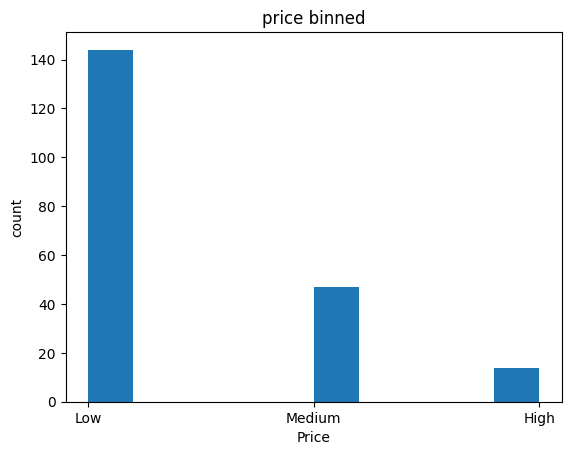

In [8]:
# pd.get_dummies(df['fuel'])
pyplot.hist(df["price-binned"])
pyplot.xlabel("Price")
pyplot.ylabel("count")
pyplot.title("price binned")

In [9]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-L/100Km,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,0.836373,65.907805,53.724878,2555.565854,126.907317,10.142537,9.949525,30.751220,12949.429268
std,1.245307,6.021776,0.059285,2.145204,2.443522,520.680204,41.642693,3.972040,2.573104,6.886443,8079.043284
min,-2.000000,86.600000,0.678039,60.300000,47.800000,1488.000000,61.000000,7.000000,4.795918,16.000000,0.000000
25%,0.000000,94.500000,0.799135,64.100000,52.000000,2145.000000,97.000000,8.600000,7.833333,25.000000,7689.000000
50%,1.000000,97.000000,0.832292,65.500000,54.100000,2414.000000,120.000000,9.000000,9.791667,30.000000,10198.000000
75%,2.000000,102.400000,0.879865,66.900000,55.500000,2935.000000,141.000000,9.400000,12.368421,34.000000,16500.000000
max,3.000000,120.900000,1.000000,72.300000,59.800000,4066.000000,326.000000,23.000000,18.076923,54.000000,45400.000000


In [10]:
drive_wheel_count=df["drive-wheels"].value_counts()

drive_wheel_count.rename(colunms={"drive-wheels":"value_count" },inplace=True)
drive_wheel_count.index.name='drive-wheels'
print(drive_wheel_count)

TypeError: Series.rename() got an unexpected keyword argument 'colunms'

In [11]:
### group by 
df_test= df[["drive-wheels","body-style","price"]]

df_grp = df_test.groupby(["drive-wheels","body-style"],as_index=False).mean()
print(df_grp)

   drive-wheels   body-style         price
0           4wd    hatchback   3801.500000
1           4wd        sedan  12647.333333
2           4wd        wagon   9095.750000
3           fwd  convertible  11595.000000
4           fwd      hardtop   8249.000000
5           fwd    hatchback   8396.387755
6           fwd        sedan   9467.526316
7           fwd        wagon   9997.333333
8           rwd  convertible  23949.600000
9           rwd      hardtop  24202.714286
10          rwd    hatchback  13583.157895
11          rwd        sedan  21711.833333
12          rwd        wagon  16994.222222


In [12]:
df_pivot= df_grp.pivot(index="drive-wheels",columns="body-style")
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   3801.500000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9467.526316   
rwd              23949.6  24202.714286  13583.157895  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

C:\Users\acer\AppData\Local\Temp\ipykernel_11076\1438002373.py:4: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


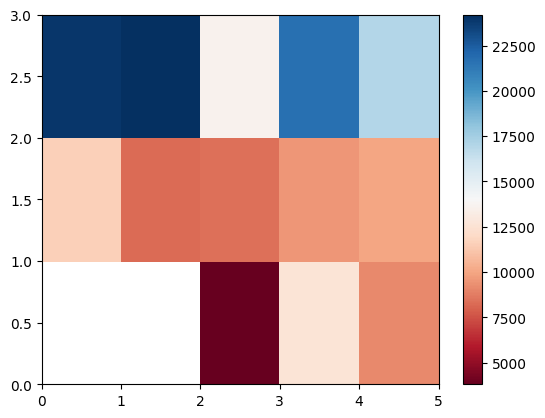

In [15]:
#### using the heatmap

plt.pcolor(df_pivot,cmap="RdBu")
plt.colorbar()
plt.show()

In [24]:
### the anova method
df_anova = df[["make","price"]]
grouped_anova = df_anova.groupby("make")
anova_results_1=stats.f_oneway (
    grouped_anova.get_group("honda") ["price"],
    grouped_anova.get_group ("jaguar") ["price"])

print(anova_results_1)


F_onewayResult(statistic=np.float64(400.925870564337), pvalue=np.float64(1.0586193512077865e-11))


(0.0, 48166.30037254046)

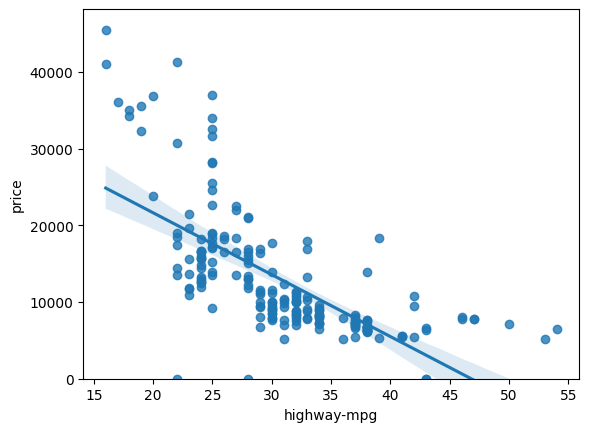

In [27]:
### correlation

sns.regplot(x="highway-mpg",y="price",data=df)
plt.ylim(0,) ## add a regression line to indicate the relationship between the 2

In [34]:
### calculate correlation
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")
df["price"] = pd.to_numeric(df["price"], errors="coerce")

person_coef,p_value= stats.pearsonr(df["horsepower"],df["price"])
print(person_coef)
print(p_value)

nan
nan
